In [25]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [ ]:
dataset = 'D:\Sign_Language_Recognition\slr\model\keypoint.csv'
model_save_path = 'model/slr_model.hdf5'
tflite_save_path = 'model/slr_model.tflite'

# Set number of classes

In [27]:
NUM_CLASSES = 25

# Dataset reading

In [28]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [29]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.85, random_state=RANDOM_SEED)

In [31]:
y_dataset

array([ 0,  0,  0, ..., 24, 24, 24])

# Model building

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [33]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 25)                275       
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [35]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [36]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
154/167 [==========================>...] - ETA: 0s - loss: 3.0752 - accuracy: 0.1061
Epoch 1: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 3.0523 - accuracy: 0.1099 - val_loss: 2.5999 - val_accuracy: 0.2221
Epoch 2/1000
161/167 [===========================>..] - ETA: 0s - loss: 2.4200 - accuracy: 0.2257
Epoch 2: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 2.4126 - accuracy: 0.2279 - val_loss: 1.8358 - val_accuracy: 0.5488
Epoch 3/1000
136/167 [=======================>......] - ETA: 0s - loss: 1.9966 - accuracy: 0.3321
Epoch 3: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.9692 - accuracy: 0.3407 - val_loss: 1.4134 - val_accuracy: 0.7029
Epoch 4/1000
165/167 [============================>.] - ETA: 0s - loss: 1.7266 - accuracy: 0.4016
Epoch 4: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.7273 - accuracy: 0.4014 - val_loss: 1.1818 - val_accuracy: 0.7349
Epoch 5/1000
140/167 [========================>.....] - ETA: 0s - loss: 1.6039 - accuracy: 0.4420
Epoch 5: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.5947 - accuracy: 0.4426 - val_loss: 1.0210 - val_accuracy: 0.7861
Epoch 6/1000
138/167 [=======================>......] - ETA: 0s - loss: 1.5092 - accuracy: 0.4688
Epoch 6: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.5050 - accuracy: 0.4699 - val_loss: 0.9349 - val_accuracy: 0.8376
Epoch 7/1000
126/167 [=====================>........] - ETA: 0s - loss: 1.4479 - accuracy: 0.4832
Epoch 7: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 1.4397 - accuracy: 0.4885 - val_loss: 0.8794 - val_accuracy: 0.8613
Epoch 8/1000
132/167 [======================>.......] - ETA: 0s - loss: 1.4022 - accuracy: 0.5002
Epoch 8: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.4002 - accuracy: 0.5016 - val_loss: 0.8305 - val_accuracy: 0.8677
Epoch 9/1000
157/167 [===========================>..] - ETA: 0s - loss: 1.3543 - accuracy: 0.5187
Epoch 9: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 1.3539 - accuracy: 0.5178 - val_loss: 0.7840 - val_accuracy: 0.8117
Epoch 10/1000
135/167 [=======================>......] - ETA: 0s - loss: 1.3199 - accuracy: 0.5280
Epoch 10: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 1.3215 - accuracy: 0.5250 - val_loss: 0.7553 - val_accuracy: 0.8797
Epoch 11/1000
167/167 [==============================] - ETA: 0s - loss: 1.2979 - accuracy: 0.5337
Epoch 11: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 1.2979 - accuracy: 0.5337 - val_loss: 0.7235 - val_accuracy: 0.8811
Epoch 12/1000
139/167 [=======================>......] - ETA: 0s - loss: 1.2780 - accuracy: 0.5397
Epoch 12: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.2736 - accuracy: 0.5407 - val_loss: 0.6962 - val_accuracy: 0.8979
Epoch 13/1000
149/167 [=========================>....] - ETA: 0s - loss: 1.2388 - accuracy: 0.5561
Epoch 13: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.2389 - accuracy: 0.5568 - val_loss: 0.6765 - val_accuracy: 0.9003
Epoch 14/1000
138/167 [=======================>......] - ETA: 0s - loss: 1.2407 - accuracy: 0.5571
Epoch 14: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.2366 - accuracy: 0.5587 - val_loss: 0.6567 - val_accuracy: 0.9365
Epoch 15/1000
162/167 [============================>.] - ETA: 0s - loss: 1.2159 - accuracy: 0.5672
Epoch 15: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.2148 - accuracy: 0.5674 - val_loss: 0.6267 - val_accuracy: 0.9195
Epoch 16/1000
156/167 [===========================>..] - ETA: 0s - loss: 1.1957 - accuracy: 0.5761
Epoch 16: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.1961 - accuracy: 0.5750 - val_loss: 0.6159 - val_accuracy: 0.8992
Epoch 17/1000
140/167 [========================>.....] - ETA: 0s - loss: 1.1877 - accuracy: 0.5723
Epoch 17: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 11ms/step - loss: 1.1952 - accuracy: 0.5719 - val_loss: 0.6148 - val_accuracy: 0.9019
Epoch 18/1000
153/167 [==========================>...] - ETA: 0s - loss: 1.1712 - accuracy: 0.5781
Epoch 18: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 1.1721 - accuracy: 0.5780 - val_loss: 0.5925 - val_accuracy: 0.9040
Epoch 19/1000
160/167 [===========================>..] - ETA: 0s - loss: 1.1514 - accuracy: 0.5871
Epoch 19: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 1.1509 - accuracy: 0.5868 - val_loss: 0.5801 - val_accuracy: 0.9224
Epoch 20/1000
132/167 [======================>.......] - ETA: 0s - loss: 1.1429 - accuracy: 0.5892
Epoch 20: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.1450 - accuracy: 0.5887 - val_loss: 0.5679 - val_accuracy: 0.8816
Epoch 21/1000
146/167 [=========================>....] - ETA: 0s - loss: 1.1253 - accuracy: 0.6011
Epoch 21: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.1218 - accuracy: 0.6019 - val_loss: 0.5459 - val_accuracy: 0.8888
Epoch 22/1000
137/167 [=======================>......] - ETA: 0s - loss: 1.1165 - accuracy: 0.5977
Epoch 22: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.1203 - accuracy: 0.5984 - val_loss: 0.5396 - val_accuracy: 0.9245
Epoch 23/1000
161/167 [===========================>..] - ETA: 0s - loss: 1.1086 - accuracy: 0.6047
Epoch 23: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.1082 - accuracy: 0.6046 - val_loss: 0.5255 - val_accuracy: 0.9064
Epoch 24/1000
155/167 [==========================>...] - ETA: 0s - loss: 1.1017 - accuracy: 0.6099
Epoch 24: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.1016 - accuracy: 0.6101 - val_loss: 0.5214 - val_accuracy: 0.9069
Epoch 25/1000
147/167 [=========================>....] - ETA: 0s - loss: 1.0924 - accuracy: 0.6108
Epoch 25: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.0895 - accuracy: 0.6125 - val_loss: 0.5106 - val_accuracy: 0.9133
Epoch 26/1000
161/167 [===========================>..] - ETA: 0s - loss: 1.0782 - accuracy: 0.6168
Epoch 26: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 1.0765 - accuracy: 0.6176 - val_loss: 0.4951 - val_accuracy: 0.9120
Epoch 27/1000
145/167 [=========================>....] - ETA: 0s - loss: 1.0653 - accuracy: 0.6250
Epoch 27: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.0612 - accuracy: 0.6271 - val_loss: 0.4918 - val_accuracy: 0.9389
Epoch 28/1000
157/167 [===========================>..] - ETA: 0s - loss: 1.0608 - accuracy: 0.6220
Epoch 28: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.0624 - accuracy: 0.6211 - val_loss: 0.4813 - val_accuracy: 0.9091
Epoch 29/1000
140/167 [========================>.....] - ETA: 0s - loss: 1.0422 - accuracy: 0.6318
Epoch 29: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.0419 - accuracy: 0.6308 - val_loss: 0.4682 - val_accuracy: 0.9168
Epoch 30/1000
145/167 [=========================>....] - ETA: 0s - loss: 1.0459 - accuracy: 0.6287
Epoch 30: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 1.0481 - accuracy: 0.6278 - val_loss: 0.4747 - val_accuracy: 0.9475
Epoch 31/1000
133/167 [======================>.......] - ETA: 0s - loss: 1.0389 - accuracy: 0.6334
Epoch 31: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.0379 - accuracy: 0.6348 - val_loss: 0.4536 - val_accuracy: 0.9165
Epoch 32/1000
133/167 [======================>.......] - ETA: 0s - loss: 1.0153 - accuracy: 0.6406
Epoch 32: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.0200 - accuracy: 0.6393 - val_loss: 0.4434 - val_accuracy: 0.9485
Epoch 33/1000
129/167 [======================>.......] - ETA: 0s - loss: 1.0215 - accuracy: 0.6401
Epoch 33: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 1.0175 - accuracy: 0.6409 - val_loss: 0.4358 - val_accuracy: 0.9147
Epoch 34/1000
145/167 [=========================>....] - ETA: 0s - loss: 1.0122 - accuracy: 0.6414
Epoch 34: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 1.0167 - accuracy: 0.6396 - val_loss: 0.4389 - val_accuracy: 0.9211
Epoch 35/1000
128/167 [=====================>........] - ETA: 0s - loss: 1.0016 - accuracy: 0.6479
Epoch 35: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.9987 - accuracy: 0.6488 - val_loss: 0.4195 - val_accuracy: 0.9291
Epoch 36/1000
167/167 [==============================] - ETA: 0s - loss: 0.9989 - accuracy: 0.6467
Epoch 36: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9989 - accuracy: 0.6467 - val_loss: 0.4132 - val_accuracy: 0.9699
Epoch 37/1000
126/167 [=====================>........] - ETA: 0s - loss: 0.9941 - accuracy: 0.6481
Epoch 37: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9977 - accuracy: 0.6467 - val_loss: 0.4134 - val_accuracy: 0.9176
Epoch 38/1000
122/167 [====================>.........] - ETA: 0s - loss: 0.9931 - accuracy: 0.6555
Epoch 38: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9886 - accuracy: 0.6559 - val_loss: 0.4095 - val_accuracy: 0.9493
Epoch 39/1000
130/167 [======================>.......] - ETA: 0s - loss: 0.9869 - accuracy: 0.6542
Epoch 39: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9816 - accuracy: 0.6566 - val_loss: 0.3964 - val_accuracy: 0.9573
Epoch 40/1000
153/167 [==========================>...] - ETA: 0s - loss: 0.9791 - accuracy: 0.6552
Epoch 40: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.9759 - accuracy: 0.6566 - val_loss: 0.3906 - val_accuracy: 0.9525
Epoch 41/1000
128/167 [=====================>........] - ETA: 0s - loss: 0.9894 - accuracy: 0.6514
Epoch 41: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.9922 - accuracy: 0.6517 - val_loss: 0.4034 - val_accuracy: 0.9493
Epoch 42/1000
153/167 [==========================>...] - ETA: 0s - loss: 0.9593 - accuracy: 0.6650
Epoch 42: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9571 - accuracy: 0.6647 - val_loss: 0.3814 - val_accuracy: 0.9675
Epoch 43/1000
136/167 [=======================>......] - ETA: 0s - loss: 0.9605 - accuracy: 0.6668
Epoch 43: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.9536 - accuracy: 0.6682 - val_loss: 0.3790 - val_accuracy: 0.9563
Epoch 44/1000
159/167 [===========================>..] - ETA: 0s - loss: 0.9511 - accuracy: 0.6631
Epoch 44: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.9533 - accuracy: 0.6633 - val_loss: 0.3738 - val_accuracy: 0.9336
Epoch 45/1000
139/167 [=======================>......] - ETA: 0s - loss: 0.9483 - accuracy: 0.6659
Epoch 45: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9460 - accuracy: 0.6664 - val_loss: 0.3728 - val_accuracy: 0.9565
Epoch 46/1000
148/167 [=========================>....] - ETA: 0s - loss: 0.9587 - accuracy: 0.6626
Epoch 46: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.9557 - accuracy: 0.6640 - val_loss: 0.3660 - val_accuracy: 0.9581
Epoch 47/1000
153/167 [==========================>...] - ETA: 0s - loss: 0.9470 - accuracy: 0.6686
Epoch 47: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9462 - accuracy: 0.6680 - val_loss: 0.3674 - val_accuracy: 0.9533
Epoch 48/1000
155/167 [==========================>...] - ETA: 0s - loss: 0.9381 - accuracy: 0.6703
Epoch 48: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.9376 - accuracy: 0.6694 - val_loss: 0.3577 - val_accuracy: 0.9547
Epoch 49/1000
145/167 [=========================>....] - ETA: 0s - loss: 0.9278 - accuracy: 0.6749
Epoch 49: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9256 - accuracy: 0.6761 - val_loss: 0.3644 - val_accuracy: 0.9525
Epoch 50/1000
162/167 [============================>.] - ETA: 0s - loss: 0.9293 - accuracy: 0.6719
Epoch 50: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9297 - accuracy: 0.6719 - val_loss: 0.3633 - val_accuracy: 0.9504
Epoch 51/1000
165/167 [============================>.] - ETA: 0s - loss: 0.9247 - accuracy: 0.6752
Epoch 51: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9241 - accuracy: 0.6755 - val_loss: 0.3591 - val_accuracy: 0.9448
Epoch 52/1000
145/167 [=========================>....] - ETA: 0s - loss: 0.9202 - accuracy: 0.6770
Epoch 52: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 11ms/step - loss: 0.9177 - accuracy: 0.6770 - val_loss: 0.3511 - val_accuracy: 0.9603
Epoch 53/1000
140/167 [========================>.....] - ETA: 0s - loss: 0.9193 - accuracy: 0.6751
Epoch 53: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.9165 - accuracy: 0.6775 - val_loss: 0.3541 - val_accuracy: 0.9528
Epoch 54/1000
146/167 [=========================>....] - ETA: 0s - loss: 0.9196 - accuracy: 0.6777
Epoch 54: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.9146 - accuracy: 0.6799 - val_loss: 0.3418 - val_accuracy: 0.9547
Epoch 55/1000
160/167 [===========================>..] - ETA: 0s - loss: 0.9084 - accuracy: 0.6796
Epoch 55: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9102 - accuracy: 0.6786 - val_loss: 0.3528 - val_accuracy: 0.9525
Epoch 56/1000
139/167 [=======================>......] - ETA: 0s - loss: 0.9093 - accuracy: 0.6810
Epoch 56: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.9096 - accuracy: 0.6800 - val_loss: 0.3464 - val_accuracy: 0.9536
Epoch 57/1000
129/167 [======================>.......] - ETA: 0s - loss: 0.8828 - accuracy: 0.6863
Epoch 57: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8874 - accuracy: 0.6863 - val_loss: 0.3386 - val_accuracy: 0.9547
Epoch 58/1000
166/167 [============================>.] - ETA: 0s - loss: 0.8958 - accuracy: 0.6885
Epoch 58: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.8958 - accuracy: 0.6885 - val_loss: 0.3380 - val_accuracy: 0.9560
Epoch 59/1000
130/167 [======================>.......] - ETA: 0s - loss: 0.8939 - accuracy: 0.6859
Epoch 59: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8906 - accuracy: 0.6863 - val_loss: 0.3281 - val_accuracy: 0.9541
Epoch 60/1000
129/167 [======================>.......] - ETA: 0s - loss: 0.8985 - accuracy: 0.6857
Epoch 60: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8901 - accuracy: 0.6895 - val_loss: 0.3245 - val_accuracy: 0.9565
Epoch 61/1000
128/167 [=====================>........] - ETA: 0s - loss: 0.8884 - accuracy: 0.6840
Epoch 61: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.8904 - accuracy: 0.6846 - val_loss: 0.3314 - val_accuracy: 0.9496
Epoch 62/1000
150/167 [=========================>....] - ETA: 0s - loss: 0.8862 - accuracy: 0.6890
Epoch 62: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8835 - accuracy: 0.6899 - val_loss: 0.3275 - val_accuracy: 0.9579
Epoch 63/1000
147/167 [=========================>....] - ETA: 0s - loss: 0.8822 - accuracy: 0.6900
Epoch 63: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8821 - accuracy: 0.6904 - val_loss: 0.3279 - val_accuracy: 0.9541
Epoch 64/1000
141/167 [========================>.....] - ETA: 0s - loss: 0.8867 - accuracy: 0.6877
Epoch 64: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8827 - accuracy: 0.6890 - val_loss: 0.3181 - val_accuracy: 0.9568
Epoch 65/1000
152/167 [==========================>...] - ETA: 0s - loss: 0.8782 - accuracy: 0.6919
Epoch 65: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.8759 - accuracy: 0.6924 - val_loss: 0.3263 - val_accuracy: 0.9560
Epoch 66/1000
160/167 [===========================>..] - ETA: 0s - loss: 0.8727 - accuracy: 0.6951
Epoch 66: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.8724 - accuracy: 0.6954 - val_loss: 0.3150 - val_accuracy: 0.9560
Epoch 67/1000
146/167 [=========================>....] - ETA: 0s - loss: 0.8759 - accuracy: 0.6923
Epoch 67: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8714 - accuracy: 0.6936 - val_loss: 0.3114 - val_accuracy: 0.9581
Epoch 68/1000
141/167 [========================>.....] - ETA: 0s - loss: 0.8703 - accuracy: 0.6903
Epoch 68: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8720 - accuracy: 0.6906 - val_loss: 0.3218 - val_accuracy: 0.9579
Epoch 69/1000
138/167 [=======================>......] - ETA: 0s - loss: 0.8754 - accuracy: 0.6950
Epoch 69: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.8691 - accuracy: 0.6960 - val_loss: 0.3057 - val_accuracy: 0.9557
Epoch 70/1000
166/167 [============================>.] - ETA: 0s - loss: 0.8710 - accuracy: 0.6942
Epoch 70: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.8710 - accuracy: 0.6942 - val_loss: 0.3183 - val_accuracy: 0.9560
Epoch 71/1000
133/167 [======================>.......] - ETA: 0s - loss: 0.8548 - accuracy: 0.6991
Epoch 71: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8545 - accuracy: 0.6967 - val_loss: 0.3085 - val_accuracy: 0.9557
Epoch 72/1000
130/167 [======================>.......] - ETA: 0s - loss: 0.8650 - accuracy: 0.6951
Epoch 72: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8613 - accuracy: 0.6947 - val_loss: 0.3033 - val_accuracy: 0.9584
Epoch 73/1000
135/167 [=======================>......] - ETA: 0s - loss: 0.8481 - accuracy: 0.7032
Epoch 73: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8493 - accuracy: 0.7024 - val_loss: 0.3041 - val_accuracy: 0.9600
Epoch 74/1000
144/167 [========================>.....] - ETA: 0s - loss: 0.8580 - accuracy: 0.7024
Epoch 74: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8542 - accuracy: 0.7034 - val_loss: 0.3060 - val_accuracy: 0.9603
Epoch 75/1000
150/167 [=========================>....] - ETA: 0s - loss: 0.8456 - accuracy: 0.7033
Epoch 75: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8419 - accuracy: 0.7059 - val_loss: 0.2987 - val_accuracy: 0.9571
Epoch 76/1000
145/167 [=========================>....] - ETA: 0s - loss: 0.8424 - accuracy: 0.7059
Epoch 76: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8436 - accuracy: 0.7045 - val_loss: 0.3060 - val_accuracy: 0.9597
Epoch 77/1000
146/167 [=========================>....] - ETA: 0s - loss: 0.8403 - accuracy: 0.7062
Epoch 77: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8421 - accuracy: 0.7054 - val_loss: 0.3068 - val_accuracy: 0.9403
Epoch 78/1000
146/167 [=========================>....] - ETA: 0s - loss: 0.8384 - accuracy: 0.7049
Epoch 78: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 0.8369 - accuracy: 0.7048 - val_loss: 0.3064 - val_accuracy: 0.9597
Epoch 79/1000
142/167 [========================>.....] - ETA: 0s - loss: 0.8311 - accuracy: 0.7048
Epoch 79: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.8296 - accuracy: 0.7035 - val_loss: 0.3001 - val_accuracy: 0.9597
Epoch 80/1000
157/167 [===========================>..] - ETA: 0s - loss: 0.8227 - accuracy: 0.7092
Epoch 80: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8225 - accuracy: 0.7086 - val_loss: 0.2993 - val_accuracy: 0.9571
Epoch 81/1000
133/167 [======================>.......] - ETA: 0s - loss: 0.8280 - accuracy: 0.7091
Epoch 81: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8304 - accuracy: 0.7089 - val_loss: 0.3001 - val_accuracy: 0.9579
Epoch 82/1000
155/167 [==========================>...] - ETA: 0s - loss: 0.8257 - accuracy: 0.7096
Epoch 82: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.8243 - accuracy: 0.7100 - val_loss: 0.2987 - val_accuracy: 0.9587
Epoch 83/1000
160/167 [===========================>..] - ETA: 0s - loss: 0.8169 - accuracy: 0.7153
Epoch 83: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8169 - accuracy: 0.7148 - val_loss: 0.2960 - val_accuracy: 0.9597
Epoch 84/1000
152/167 [==========================>...] - ETA: 0s - loss: 0.8331 - accuracy: 0.7065
Epoch 84: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8339 - accuracy: 0.7060 - val_loss: 0.2971 - val_accuracy: 0.9592
Epoch 85/1000
128/167 [=====================>........] - ETA: 0s - loss: 0.8190 - accuracy: 0.7084
Epoch 85: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8145 - accuracy: 0.7096 - val_loss: 0.2955 - val_accuracy: 0.9597
Epoch 86/1000
143/167 [========================>.....] - ETA: 0s - loss: 0.8111 - accuracy: 0.7151
Epoch 86: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.8105 - accuracy: 0.7155 - val_loss: 0.2993 - val_accuracy: 0.9589
Epoch 87/1000
148/167 [=========================>....] - ETA: 0s - loss: 0.8167 - accuracy: 0.7077
Epoch 87: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.8110 - accuracy: 0.7111 - val_loss: 0.2868 - val_accuracy: 0.9624
Epoch 88/1000
151/167 [==========================>...] - ETA: 0s - loss: 0.8084 - accuracy: 0.7180
Epoch 88: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.8070 - accuracy: 0.7181 - val_loss: 0.2854 - val_accuracy: 0.9619
Epoch 89/1000
138/167 [=======================>......] - ETA: 0s - loss: 0.7966 - accuracy: 0.7174
Epoch 89: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7933 - accuracy: 0.7190 - val_loss: 0.2841 - val_accuracy: 0.9560
Epoch 90/1000
144/167 [========================>.....] - ETA: 0s - loss: 0.8063 - accuracy: 0.7187
Epoch 90: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.8054 - accuracy: 0.7185 - val_loss: 0.2920 - val_accuracy: 0.9613
Epoch 91/1000
160/167 [===========================>..] - ETA: 0s - loss: 0.7940 - accuracy: 0.7224
Epoch 91: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.7957 - accuracy: 0.7204 - val_loss: 0.2862 - val_accuracy: 0.9659
Epoch 92/1000
137/167 [=======================>......] - ETA: 0s - loss: 0.7913 - accuracy: 0.7209
Epoch 92: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7953 - accuracy: 0.7188 - val_loss: 0.2830 - val_accuracy: 0.9691
Epoch 93/1000
140/167 [========================>.....] - ETA: 0s - loss: 0.7986 - accuracy: 0.7194
Epoch 93: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7955 - accuracy: 0.7192 - val_loss: 0.2866 - val_accuracy: 0.9619
Epoch 94/1000
129/167 [======================>.......] - ETA: 0s - loss: 0.7816 - accuracy: 0.7245
Epoch 94: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7800 - accuracy: 0.7256 - val_loss: 0.2885 - val_accuracy: 0.9632
Epoch 95/1000
145/167 [=========================>....] - ETA: 0s - loss: 0.7746 - accuracy: 0.7303
Epoch 95: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.7722 - accuracy: 0.7297 - val_loss: 0.2901 - val_accuracy: 0.9616
Epoch 96/1000
164/167 [============================>.] - ETA: 0s - loss: 0.7809 - accuracy: 0.7279
Epoch 96: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.7822 - accuracy: 0.7276 - val_loss: 0.2861 - val_accuracy: 0.9603
Epoch 97/1000
133/167 [======================>.......] - ETA: 0s - loss: 0.7919 - accuracy: 0.7223
Epoch 97: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7865 - accuracy: 0.7246 - val_loss: 0.2775 - val_accuracy: 0.9701
Epoch 98/1000
152/167 [==========================>...] - ETA: 0s - loss: 0.7761 - accuracy: 0.7266
Epoch 98: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7776 - accuracy: 0.7258 - val_loss: 0.2785 - val_accuracy: 0.9683
Epoch 99/1000
158/167 [===========================>..] - ETA: 0s - loss: 0.7799 - accuracy: 0.7232
Epoch 99: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7827 - accuracy: 0.7240 - val_loss: 0.2777 - val_accuracy: 0.9549
Epoch 100/1000
129/167 [======================>.......] - ETA: 0s - loss: 0.7828 - accuracy: 0.7275
Epoch 100: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7838 - accuracy: 0.7273 - val_loss: 0.2839 - val_accuracy: 0.9667
Epoch 101/1000
142/167 [========================>.....] - ETA: 0s - loss: 0.7774 - accuracy: 0.7272
Epoch 101: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7764 - accuracy: 0.7256 - val_loss: 0.2979 - val_accuracy: 0.9651
Epoch 102/1000
153/167 [==========================>...] - ETA: 0s - loss: 0.7755 - accuracy: 0.7288
Epoch 102: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7775 - accuracy: 0.7274 - val_loss: 0.2810 - val_accuracy: 0.9600
Epoch 103/1000
158/167 [===========================>..] - ETA: 0s - loss: 0.7813 - accuracy: 0.7275
Epoch 103: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7803 - accuracy: 0.7276 - val_loss: 0.2978 - val_accuracy: 0.9629
Epoch 104/1000
147/167 [=========================>....] - ETA: 0s - loss: 0.7784 - accuracy: 0.7222
Epoch 104: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.7742 - accuracy: 0.7249 - val_loss: 0.2735 - val_accuracy: 0.9613
Epoch 105/1000
166/167 [============================>.] - ETA: 0s - loss: 0.7632 - accuracy: 0.7293
Epoch 105: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7633 - accuracy: 0.7292 - val_loss: 0.2757 - val_accuracy: 0.9387
Epoch 106/1000
135/167 [=======================>......] - ETA: 0s - loss: 0.7774 - accuracy: 0.7252
Epoch 106: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7733 - accuracy: 0.7263 - val_loss: 0.2770 - val_accuracy: 0.9597
Epoch 107/1000
164/167 [============================>.] - ETA: 0s - loss: 0.7645 - accuracy: 0.7265
Epoch 107: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7643 - accuracy: 0.7272 - val_loss: 0.2709 - val_accuracy: 0.9720
Epoch 108/1000
149/167 [=========================>....] - ETA: 0s - loss: 0.7590 - accuracy: 0.7341
Epoch 108: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7612 - accuracy: 0.7341 - val_loss: 0.2917 - val_accuracy: 0.9629
Epoch 109/1000
128/167 [=====================>........] - ETA: 0s - loss: 0.7512 - accuracy: 0.7325
Epoch 109: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7551 - accuracy: 0.7337 - val_loss: 0.2782 - val_accuracy: 0.9523
Epoch 110/1000
156/167 [===========================>..] - ETA: 0s - loss: 0.7537 - accuracy: 0.7344
Epoch 110: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 0.7530 - accuracy: 0.7335 - val_loss: 0.2653 - val_accuracy: 0.9677
Epoch 111/1000
154/167 [==========================>...] - ETA: 0s - loss: 0.7640 - accuracy: 0.7303
Epoch 111: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 9ms/step - loss: 0.7610 - accuracy: 0.7313 - val_loss: 0.2751 - val_accuracy: 0.9424
Epoch 112/1000
140/167 [========================>.....] - ETA: 0s - loss: 0.7596 - accuracy: 0.7313
Epoch 112: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7564 - accuracy: 0.7336 - val_loss: 0.2798 - val_accuracy: 0.9496
Epoch 113/1000
145/167 [=========================>....] - ETA: 0s - loss: 0.7644 - accuracy: 0.7333
Epoch 113: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 2s 10ms/step - loss: 0.7590 - accuracy: 0.7353 - val_loss: 0.2759 - val_accuracy: 0.9632
Epoch 114/1000
158/167 [===========================>..] - ETA: 0s - loss: 0.7595 - accuracy: 0.7332
Epoch 114: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.7610 - accuracy: 0.7326 - val_loss: 0.2987 - val_accuracy: 0.9645
Epoch 115/1000
135/167 [=======================>......] - ETA: 0s - loss: 0.7690 - accuracy: 0.7299
Epoch 115: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.7638 - accuracy: 0.7312 - val_loss: 0.2846 - val_accuracy: 0.9664
Epoch 116/1000
149/167 [=========================>....] - ETA: 0s - loss: 0.7444 - accuracy: 0.7380
Epoch 116: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7433 - accuracy: 0.7377 - val_loss: 0.2589 - val_accuracy: 0.9672
Epoch 117/1000
151/167 [==========================>...] - ETA: 0s - loss: 0.7450 - accuracy: 0.7380
Epoch 117: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7441 - accuracy: 0.7391 - val_loss: 0.2639 - val_accuracy: 0.9571
Epoch 118/1000
162/167 [============================>.] - ETA: 0s - loss: 0.7418 - accuracy: 0.7422
Epoch 118: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7407 - accuracy: 0.7421 - val_loss: 0.2747 - val_accuracy: 0.9851
Epoch 119/1000
158/167 [===========================>..] - ETA: 0s - loss: 0.7455 - accuracy: 0.7378
Epoch 119: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.7433 - accuracy: 0.7390 - val_loss: 0.2753 - val_accuracy: 0.9573
Epoch 120/1000
146/167 [=========================>....] - ETA: 0s - loss: 0.7563 - accuracy: 0.7373
Epoch 120: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7506 - accuracy: 0.7378 - val_loss: 0.2687 - val_accuracy: 0.9464
Epoch 121/1000
134/167 [=======================>......] - ETA: 0s - loss: 0.7493 - accuracy: 0.7377
Epoch 121: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.7485 - accuracy: 0.7377 - val_loss: 0.2847 - val_accuracy: 0.9651
Epoch 122/1000
155/167 [==========================>...] - ETA: 0s - loss: 0.7505 - accuracy: 0.7377
Epoch 122: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7484 - accuracy: 0.7383 - val_loss: 0.2694 - val_accuracy: 0.9656
Epoch 123/1000
166/167 [============================>.] - ETA: 0s - loss: 0.7519 - accuracy: 0.7359
Epoch 123: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7519 - accuracy: 0.7359 - val_loss: 0.2752 - val_accuracy: 0.9451
Epoch 124/1000
155/167 [==========================>...] - ETA: 0s - loss: 0.7405 - accuracy: 0.7377
Epoch 124: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 9ms/step - loss: 0.7388 - accuracy: 0.7380 - val_loss: 0.2691 - val_accuracy: 0.9643
Epoch 125/1000
155/167 [==========================>...] - ETA: 0s - loss: 0.7511 - accuracy: 0.7388
Epoch 125: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7494 - accuracy: 0.7388 - val_loss: 0.2821 - val_accuracy: 0.9592
Epoch 126/1000
160/167 [===========================>..] - ETA: 0s - loss: 0.7448 - accuracy: 0.7389
Epoch 126: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7437 - accuracy: 0.7386 - val_loss: 0.2857 - val_accuracy: 0.9637
Epoch 127/1000
123/167 [=====================>........] - ETA: 0s - loss: 0.7289 - accuracy: 0.7444
Epoch 127: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7267 - accuracy: 0.7443 - val_loss: 0.2700 - val_accuracy: 0.9624
Epoch 128/1000
163/167 [============================>.] - ETA: 0s - loss: 0.7357 - accuracy: 0.7391
Epoch 128: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7345 - accuracy: 0.7393 - val_loss: 0.2761 - val_accuracy: 0.9413
Epoch 129/1000
126/167 [=====================>........] - ETA: 0s - loss: 0.7454 - accuracy: 0.7371
Epoch 129: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7419 - accuracy: 0.7381 - val_loss: 0.2864 - val_accuracy: 0.9613
Epoch 130/1000
156/167 [===========================>..] - ETA: 0s - loss: 0.7262 - accuracy: 0.7435
Epoch 130: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7276 - accuracy: 0.7435 - val_loss: 0.2751 - val_accuracy: 0.9621
Epoch 131/1000
143/167 [========================>.....] - ETA: 0s - loss: 0.7373 - accuracy: 0.7425
Epoch 131: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7383 - accuracy: 0.7420 - val_loss: 0.2850 - val_accuracy: 0.9635
Epoch 132/1000
155/167 [==========================>...] - ETA: 0s - loss: 0.7321 - accuracy: 0.7428
Epoch 132: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 7ms/step - loss: 0.7304 - accuracy: 0.7439 - val_loss: 0.2773 - val_accuracy: 0.9651
Epoch 133/1000
161/167 [===========================>..] - ETA: 0s - loss: 0.7358 - accuracy: 0.7443
Epoch 133: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7338 - accuracy: 0.7448 - val_loss: 0.2781 - val_accuracy: 0.9589
Epoch 134/1000
129/167 [======================>.......] - ETA: 0s - loss: 0.7353 - accuracy: 0.7413
Epoch 134: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7320 - accuracy: 0.7424 - val_loss: 0.2835 - val_accuracy: 0.9429
Epoch 135/1000
130/167 [======================>.......] - ETA: 0s - loss: 0.7412 - accuracy: 0.7397
Epoch 135: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7389 - accuracy: 0.7395 - val_loss: 0.2805 - val_accuracy: 0.9667
Epoch 136/1000
145/167 [=========================>....] - ETA: 0s - loss: 0.7172 - accuracy: 0.7485
Epoch 136: saving model to model\slr_model.hdf5_2


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model\slr_model.hdf5_2\assets


167/167 [==============================] - 1s 8ms/step - loss: 0.7168 - accuracy: 0.7480 - val_loss: 0.2677 - val_accuracy: 0.9469
Epoch 136: early stopping


In [37]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

30/30 [==============================] - 0s 981us/step - loss: 0.2677 - accuracy: 0.9469


In [38]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [39]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 160ms/step
[2.7134115e-18 1.7837822e-16 9.9910666e-09 3.9604389e-31 0.0000000e+00
 3.0487035e-23 3.9937016e-01 5.1365799e-01 3.4420839e-12 0.0000000e+00
 1.4478834e-08 1.6967113e-29 4.5326872e-16 4.6670805e-12 1.4902128e-23
 6.2199203e-28 8.6030756e-15 1.5670417e-37 8.6942561e-02 7.0001411e-25
 0.0000000e+00 0.0000000e+00 2.9261373e-05 1.8874313e-30 7.3721976e-38]
7


# Confusion matrix

In [40]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)


118/118 [==============================] - 0s 712us/step


118/118 [==============================] - 0s 658us/step


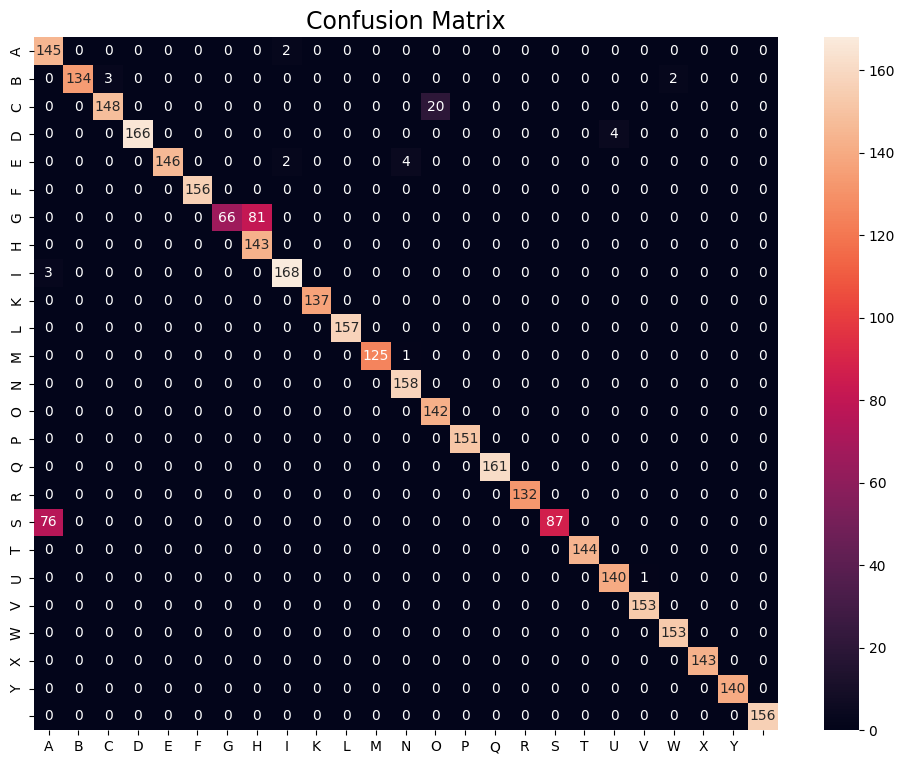

Accuracy   : 0.9469333333333333


In [41]:
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"," "]
prediction = model.predict(X_test)
y_pred = np.argmax(prediction, axis=1)


cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
plt.subplots(figsize=(12, 9))

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix',fontsize=17)
# plt.ylabel('Prediction',fontsize=13)
# plt.xlabel('Actual',fontsize=13)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)


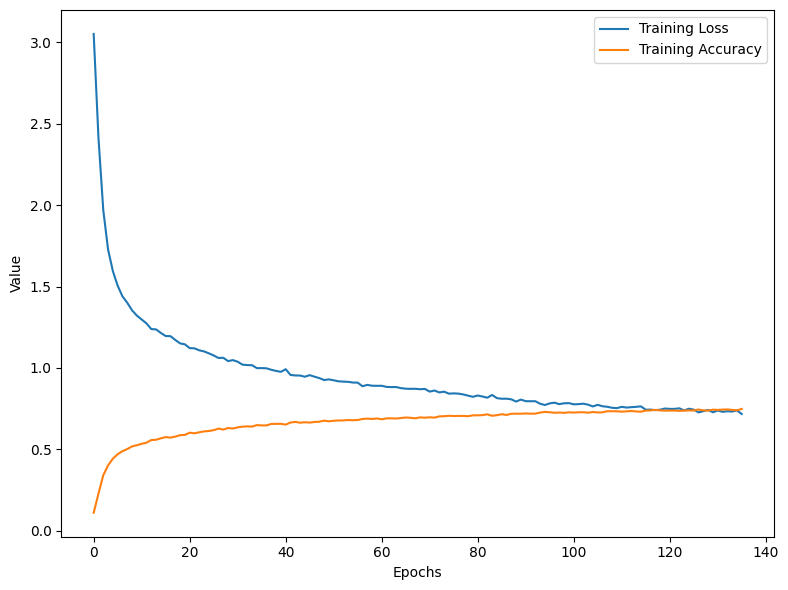

In [42]:
# Extract the loss and accuracy values from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create a figure for loss and accuracy
plt.figure(figsize=(8, 6))

# Plot the loss curve
plt.plot(loss, label='Training Loss')
plt.plot(accuracy, label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Convert to model for Tensorflow-Lite

In [43]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

INFO:tensorflow:Assets written to: model/slr_model.hdf5_2\assets


INFO:tensorflow:Assets written to: model/slr_model.hdf5_2\assets


In [44]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\JATINY~1\AppData\Local\Temp\tmpdihz98tx\assets


INFO:tensorflow:Assets written to: C:\Users\JATINY~1\AppData\Local\Temp\tmpdihz98tx\assets


7496